<a href="https://colab.research.google.com/github/felipefrocha/esufmg-evolutionary-computation/blob/master/RASTRIGIN_Felipe_Rocha_Matheus_Cascalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab3 - Computação Evolucionária
## Alunos:
- Felipe Fonseca Rocha
- Matheus Cascalho

### Descrição do problema:
Considere a notacão a seguir:

Problema de Otimizacão não linear irrestrito de variaveis continuas:

$$ \bar{x} = arg\  \min\limits_{x} f(x) $$

$ \mu_{[a,b]} = $ probabilidade de recombinação. Sugestão: $ C \in [0.6,0.9] $

$F = $ fator de escala. Sugestão $ F \in [0.7,0.9] $

Seja uma população de N solucoes candidatas na t­esima iteracao:
$$ X_t = \left\{  x_{t,i} , i = 1, ... , N \right\}$$
Cada individuo é representado por um vetor coluna:
$$ x_{t,i} = \left[ x_{t,i,1},x_{t,i,2},..., x_{t,i,n}  \right] ^T $$
em que o terceito indice indica uma entre as n variaveis de decisão do problema.

### Tarefa

```
    WHILE critério para DO
        FOR i = 1 TO n DO
            select_random(r1,r2,r3)
            slect_random(fi_i)
            FOR j = 1 TO n DO
                IF mi[0,1] < C && j == fi_i THEN
                    mi[t,i,j] = x[i,r1,j] + function_F(x[t,r2,j] - x[t,r3,j])
                ELSE
                    mi[t,i,j] = x[t,i,j]
                END IF

            END FOR
            IF function(mi[i,j]) <= function(x[t,i]) THEN
                x[t+1,i] = mi[ti]
            ELSE
                x[t+1,i] = x[t,i]
            END IF 
        END FOR
        t = t + 1
    END WHILE
```


Testar o codigo de algoritimo de evolução diferencial para o seguinte problema multimodal de otimização contínua:



### **rastrigin** para:  
$$ \left \lbrace 
 \begin{array}{c}
 -2 \leq x_1 \leq 2 \\
 -2 \leq x_2 \leq 3 \\
 N = 100 \\
 \bar{x} = [0,0] \\
 \min\limits_{x} f(x_1,x_2) = -20
 \end{array}
\right\}
$$



In [2]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np
from typing import List


import random

In [3]:
def rastrigin(x1, **kwargs):
    A = kwargs.get('A', 10)
    return A * len(x1) + sum([(x ** 2 - A * np.cos(2 * math.pi * x)) for x in x1])


In [4]:
def get_pair(upper_limit, bottom_limit):
    return [ random.randint(bottom_limit, upper_limit) * random.random(), random.randint(bottom_limit,upper_limit) * random.random() ]

In [5]:

def generate_initial_solution(upper_limit:int = 2, bottom_limit:int=-2, n:int = 100, ):
    return np.array([ get_pair( upper_limit, bottom_limit) for _ in range(n)])

In [6]:



def test_recombination(param, recombination:List):
    return recombination[0] <= param <= recombination[1]

In [7]:

function_objetivo = rastrigin

Find a better sollution: (36.16050547421283, 0.0, 16.714385621637536, 9.752060286461814)


<Figure size 1080x360 with 0 Axes>

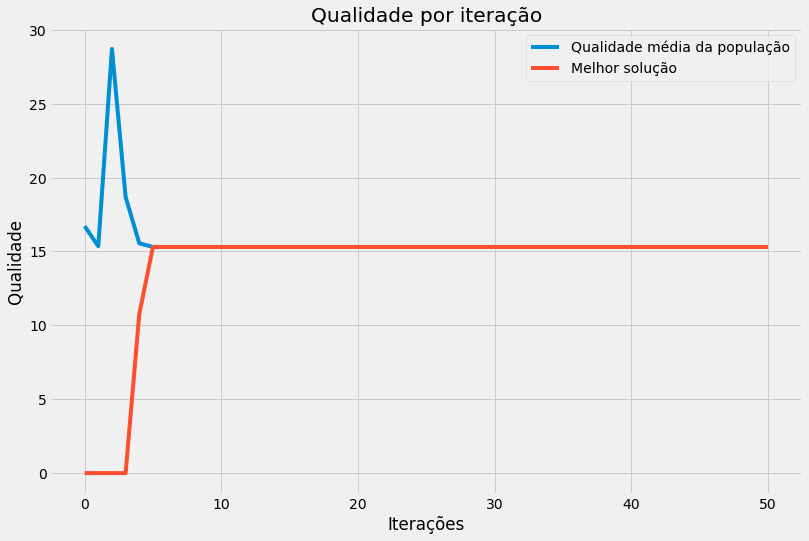

In [8]:
data = []
population_size = 100
recombination = [0.6, 0.9]
factor_interval = [0.7, 0.9]
factor = random.randint(700, 900) / 1000
mu = np.array([0.0, 0.0])
pop_initial = generate_initial_solution(2, -2, population_size)
new_generation = []
flag = 0
better = 50.0
for g in range(1000):
    for i in range(population_size):
        fitness = [function_objetivo(individual) for individual in pop_initial]
        # select target vector
        target = pop_initial[i]
        # list indexes but target
        indexes = [idx for idx in range(population_size) if idx != i]  # (j = 0)
        # select r1, r2, r3
        selected = np.random.choice(indexes, 3, replace=False)
        r1, r2, r3 = pop_initial[selected]

        for j in range(len(r1)):
            # get recombination parts
            p = random.random()
            if test_recombination(p, recombination):
                mu[j] = r1[j] + factor * (r2[j] - r3[j])
            else:
                mu[j] = target[j]

        if function_objetivo(mu) <= function_objetivo(target):
            new_generation.append(mu)
        else:
            new_generation.append(target)

    pop_initial = np.array(new_generation)
    new_generation = []
    data.append((max(fitness), min(fitness), sum(fitness) / len(fitness), np.std(fitness)))

    if min(fitness) < better:
        flag = 0
        better = min(fitness)
        print(f'Find a better sollution: {data[g]}')
    else:
        flag += 1
        if flag >= 50:
            break


maximum_value = [element[0] for element in data]
min_value = [element[1] for element in data]
mean_value = [element[2] for element in data]
deviation_value = [element[3] for element in data]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 5))
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(mean_value)), mean_value , label='Qualidade média da população')
plt.plot(np.arange(len(min_value)), min_value, label='Melhor solução')
plt.xlabel('Iterações')
plt.ylabel('Qualidade')
plt.title('Qualidade por iteração')
plt.legend();
exit(0)
